In [34]:
!wget https://www.spataru.at/students/course_files/week4/loan.csv

--2023-12-12 12:50:23--  https://www.spataru.at/students/course_files/week4/loan.csv
Resolving www.spataru.at (www.spataru.at)... 81.19.159.92
Connecting to www.spataru.at (www.spataru.at)|81.19.159.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38013 (37K) [text/csv]
Saving to: ‘loan.csv.1’

loan.csv.1          100%[===================>]  37.12K   166KB/s    in 0.2s    

2023-12-12 12:50:24 (166 KB/s) - ‘loan.csv.1’ saved [38013/38013]



In [35]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from  sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from  sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import model_selection
import plotly.express as px

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [37]:
df = pd.read_csv("loan.csv")

# EDA

In [38]:
df.shape

(614, 13)

In [39]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [40]:
df.Loan_Status.value_counts()[0]/df.shape[0]

0.6872964169381107

In [41]:
px.bar(data_frame=df, x="Loan_Status")

In [42]:
px.histogram(data_frame=df, x="ApplicantIncome", color="Loan_Status")

In [43]:
px.histogram(data_frame=df, x="ApplicantIncome", color="Education")

In [44]:
df.Gender.isna().sum()

13

In [45]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [46]:
categorical_features = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Credit_History", "Property_Area"]

In [47]:
impute = SimpleImputer(missing_values=np.NaN, strategy="most_frequent")

In [48]:
df[categorical_features] = impute.fit_transform(df[categorical_features])

In [49]:
df.Gender.isna().sum()

0

In [50]:
df[["LoanAmount"]]

,LoanAmount
0,NaN
1,128.0
2,66.0
3,120.0
4,141.0
...,...
609,71.0
610,40.0
611,253.0
612,187.0


In [51]:
df["LoanAmount"] = impute.fit_transform(df[["LoanAmount"]])

In [52]:
df.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [53]:
df = df.drop("Loan_ID", axis=1)

In [54]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [55]:
df["Gender"] = df["Gender"].astype("category")

In [56]:
for col in categorical_features:
  df[col] = df[col].astype("category")

# Split Input and Output

In [57]:
df = pd.get_dummies(df, drop_first=True)

In [58]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,120.0,360.0,1,0,0,0,0,0,0,1,0,1,1
1,4583,1508.0,128.0,360.0,1,1,1,0,0,0,0,1,0,0,0
2,3000,0.0,66.0,360.0,1,1,0,0,0,0,1,1,0,1,1
3,2583,2358.0,120.0,360.0,1,1,0,0,0,1,0,1,0,1,1
4,6000,0.0,141.0,360.0,1,0,0,0,0,0,0,1,0,1,1


In [59]:
df["Loan_Amount_Term"] = impute.fit_transform(df[["Loan_Amount_Term"]])

In [60]:
X = df[df.columns[:-1]]

In [61]:
y = df[[df.columns[-1]]]

# Decision Tree

In [62]:
model = DecisionTreeClassifier()

In [63]:
model.fit(X,y)

DecisionTreeClassifier()

[Text(0.4348928157589803, 0.9736842105263158, 'x[11] <= 0.5\ngini = 0.43\nsamples = 614\nvalue = [192, 422]'),
 Text(0.08574739281575898, 0.9210526315789473, 'x[2] <= 547.5\ngini = 0.145\nsamples = 89\nvalue = [82, 7]'),
 Text(0.07647740440324449, 0.868421052631579, 'x[1] <= 8115.0\ngini = 0.127\nsamples = 88\nvalue = [82, 6]'),
 Text(0.05098493626882966, 0.8157894736842105, 'x[0] <= 4316.5\ngini = 0.11\nsamples = 86\nvalue = [81, 5]'),
 Text(0.027809965237543453, 0.7631578947368421, 'x[3] <= 240.0\ngini = 0.036\nsamples = 54\nvalue = [53, 1]'),
 Text(0.01853997682502897, 0.7105263157894737, 'x[0] <= 2546.0\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.009269988412514484, 0.6578947368421053, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.027809965237543453, 0.6578947368421053, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.03707995365005794, 0.7105263157894737, 'gini = 0.0\nsamples = 46\nvalue = [46, 0]'),
 Text(0.07415990730011587, 0.7631578947368421, 'x[0] <= 4934.0

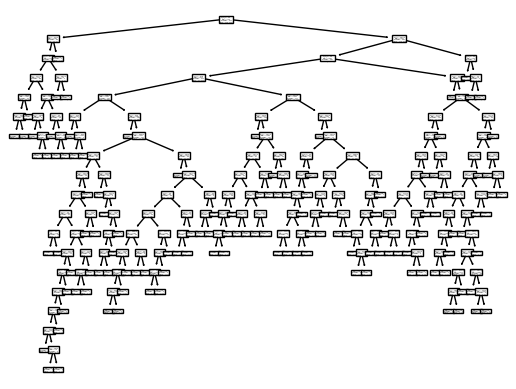

In [64]:
tree.plot_tree(model)

In [65]:
model.score(X,y)

1.0

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)#



StandardScaler()

In [80]:
numericalFeatures = X_train.columns[:4]

scaler = StandardScaler()
scaler.fit(X_train[numericalFeatures])
X_train[numericalFeatures] = scaler.transform(X_train[numericalFeatures])





/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



{'fit_time': array([0.00806999, 0.00491619, 0.00406075]),
 'score_time': array([0.01406932, 0.01484227, 0.01387119]),
 'test_score': array([0.70072993, 0.71532847, 0.72992701])}

# Evaluation

In [67]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.5665024630541872

# K-Folds Cross Validation

In [84]:
model = KNeighborsClassifier()

model.fit(X_train, y_train)
model.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.35467980295566504

In [85]:
cross_validate(model, X_train, y_train, cv = 3, scoring = ["f1", "precision", "recall"])

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



{'fit_time': array([0.00575757, 0.00387239, 0.00366473]),
 'score_time': array([0.02815056, 0.02735925, 0.02726531]),
 'test_f1': array([0.83333333, 0.78      , 0.82587065]),
 'test_precision': array([0.79439252, 0.75728155, 0.79807692]),
 'test_recall': array([0.87628866, 0.80412371, 0.8556701 ])}

### NB


In [86]:
model = GaussianNB()
cross_validate(model, X_train, y_train, cv = 3, scoring = ["f1", "precision", "recall"])


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



{'fit_time': array([0.00623226, 0.00378895, 0.00376844]),
 'score_time': array([0.02078414, 0.01882768, 0.01970768]),
 'test_f1': array([0.87323944, 0.86124402, 0.87735849]),
 'test_precision': array([0.80172414, 0.80357143, 0.80869565]),
 'test_recall': array([0.95876289, 0.92783505, 0.95876289])}